**INX Future Inc Employee Performance - Project**

INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers in the past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry.
In the recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and
client satisfaction levels came down by 8 percentage points.
 The project aim is to analyse the current employee data and find
the core underlying causes of this performance issues.
The following insights are expected from this project.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees.
4. Recommendations to improve the employee performance based on insights from analysis.






In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

-pandas for data exploration and manipulation

-numpy is for numerical python

-matplotlib and seaborn are for data visualization

In [2]:
#loading the dataset
from google.colab import files
data=files.upload()

Saving INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv to INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).csv


In [3]:
#Using pandas to read the dataset and storing the data in a variable name called 'df'

df=pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

**Exploratory Data Analysis**(EDA)

EDA helps in checking for patterns,outliers,trends and indepth insights from the given data set.

In [4]:
#checking the first 5 rows to see how the data is structured.
df.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
#checking the data types in the data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

The data frame contains both categorical data with Dtype 'object' and non-categorical data with Dtype 'int64'.

In [6]:
df.shape


(1200, 28)

The data frame has 1200 rows and 28 columns.

In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
#checking for all the null values
df.isnull().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


The data set does not have any null values in all the columns hence no need of replacing the null values with either the mean or the mode.

In [9]:
#checking for duplicates
df.duplicated().sum()

0

The data set has no duplicates hence all the rows and columns are unique.

In [10]:
# checking for outliers
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outlier detection
threshold = 1.5

# Identify outliers (only for numeric columns)
outliers = ((numeric_df < (Q1 - threshold * IQR)) | (numeric_df > (Q3 + threshold * IQR))).sum()


# Print the number of outliers in each column
print(outliers)

Age                               0
DistanceFromHome                  0
EmpEducationLevel                 0
EmpEnvironmentSatisfaction        0
EmpHourlyRate                     0
EmpJobInvolvement                 0
EmpJobLevel                       0
EmpJobSatisfaction                0
NumCompaniesWorked               39
EmpLastSalaryHikePercent          0
EmpRelationshipSatisfaction       0
TotalWorkExperienceInYears       51
TrainingTimesLastYear           188
EmpWorkLifeBalance                0
ExperienceYearsAtThisCompany     56
ExperienceYearsInCurrentRole     16
YearsSinceLastPromotion          88
YearsWithCurrManager             11
PerformanceRating               326
dtype: int64


Although the dataset contains outliers,I chose not to remove them as they provide valuable insights for our analysis. Outliers often represent significant variations that can be crucial for understanding the full scope of the data.Removing them might have resulted in a loss of critical information, potentially skewing the results and reducing the overall effectiveness of the model.

In [11]:
#defining my categorical and non-categoricals columns
categorical_columns=[]
noncategorical_columns=[]

for column in df.columns:
  if df[column].dtype=='object':
    categorical_columns.append(column)
  else:
      noncategorical_columns.append(column)

print('categorical columns')
print(categorical_columns)
print('\n noncategorical columns')
print(noncategorical_columns)

categorical columns
['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

 noncategorical columns
['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


The dataset has 9 categorical columns that contain data that represents categories or labels. They are usually of the 'object' data type in pandas and 19 non-categorical columns that contain numerical data that can be measured or counted. They are usually of numeric data types like 'int64' or 'float64' in pandas.

**Identifying Unique Features **

In [12]:
df['EducationBackground'].unique()


array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [13]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [14]:
df['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [15]:
df['EmpJobRole'].unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [16]:
df['PerformanceRating'].unique()

array([3, 4, 2])

In [17]:
df['EmpJobSatisfaction'].unique()

array([4, 1, 2, 3])

In [18]:
df['EmpJobInvolvement'].unique()

array([3, 2, 1, 4])

In [19]:
df['EmpJobLevel'].unique()

array([2, 3, 5, 1, 4])

In [20]:
df['EmpWorkLifeBalance'].unique()#have a dictionary


array([2, 3, 4, 1])

In [21]:
df['EmpEnvironmentSatisfaction'].unique()

array([4, 2, 1, 3])

In [22]:
df['EmpWorkLifeBalance'].unique()

array([2, 3, 4, 1])

From the given data,the following are the maps for some of the numerical columns:

EmpEnvironmentSatisfaction
	(1='Low'
	2= 'Medium'
	3 ='High'
	4 ='Very High')

EmpJobInvolvement	(1= 'Low'
	2 ='Medium'
	3 ='High'
	4 ='Very High')

EmpJobSatisfaction(	1= 'Low'
	2 ='Medium'
	3 ='High'
	4 ='Very High')

PerformanceRating	(1= 'Low'
	2 ='Good'
	3 ='Excellent'
	4 ='Outstanding')

RelationshipSatisfaction	(1= 'Low'
	2 ='Medium'
	3 ='High'
	4 ='Very High')

EmpWorkLifeBalance (	1= 'Bad'
	2= 'Good'
	3 ='Better'
	4= 'Best')



**VISUALIZATION**

<ipython-input-23-57f69e2e6821>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_avg_perf.index, y=dept_avg_perf.values, palette='coolwarm')


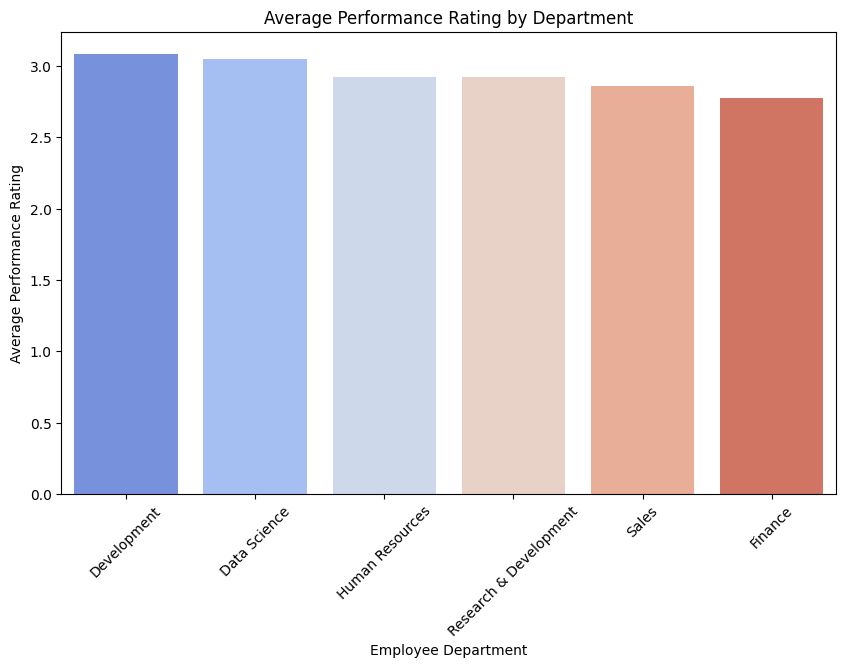

In [23]:
#  Department-wise Average Performance Rating
dept_avg_perf = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_avg_perf.index, y=dept_avg_perf.values, palette='coolwarm')
plt.title('Average Performance Rating by Department')
plt.xlabel('Employee Department')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the average performance rating for employees in each department.

Key Insights:

Top-Performing Departments: Departments Development and Data Science have higher average performance ratings, indicating strong overall performance.

Low-Performing Departments: Departments like Sales and Finance have lower average performance ratings, which might indicate issues with management, employee engagement, or resource allocation.

There are clear discrepancies in average performance ratings between departments, suggesting differences in either employee capabilities or departmental management practices.

High-performing departments may be models for best practices in employee engagement and performance management.

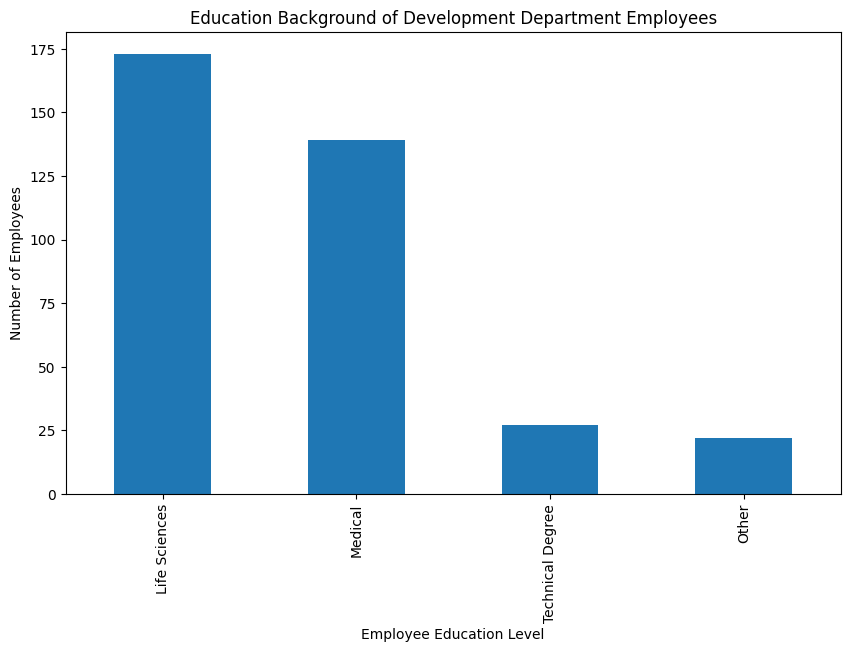

In [24]:
#Education background of the employees in the best perfoming Department.

Development = df[df['EmpDepartment'] == 'Development']  # Filter the DataFrame to get only the development employees

# Count the occurrences of each education level
education_counts = Development['EducationBackground'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.title('Education Background of Development Department Employees')
plt.xlabel('Employee Education Level')
plt.ylabel('Number of Employees')
plt.show()

The majority of employees in the Development department have a background in Life Sciences, indicating that this field is highly valued or required for roles within this department.

A significant portion of employees also have a Medical background, suggesting that the Development department might be involved in work that intersects with medical research, healthcare, or biotechnology.

A smaller group of employees have a Technical Degree, indicating that specialized technical skills are necessary but not as prevalent as life sciences or medical knowledge.

A few employees have educational backgrounds classified as "Other," suggesting some diversity in educational experience, but this is a minority.

The Development department appears to heavily rely on employees with strong backgrounds in Life Sciences and Medical fields. This might reflect the nature of work in the department, which could involve research, development in healthcare, or biotechnology areas. Technical degrees and other backgrounds are less common, indicating more niche roles that require specific technical skills or diverse experiences.

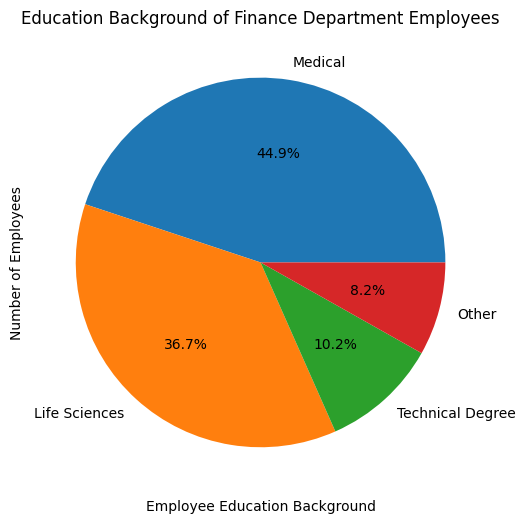

In [25]:
#Education Background of the employees in the Least Perfoming Department

Finance = df[df['EmpDepartment'] == 'Finance']  # Filter the DataFrame to get only Finance employees

# Count the occurrences of each education level
education_counts = Finance['EducationBackground'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
education_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Education Background of Finance Department Employees')
plt.xlabel('Employee Education Background')
plt.ylabel('Number of Employees')
plt.show()

The majority of employees in the Finance department have a background in Medical and life science education backgrounds while the rest have technical degrees and other education background.This shows very few or none have an education background in finance.This might be a good indicator why the Finance department is performing poorly and to improve this the company should hire or recruit employees with an education background in finance.

<ipython-input-26-6dec3745251d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='EmpDepartment', y='EmpEnvironmentSatisfaction',palette='deep')


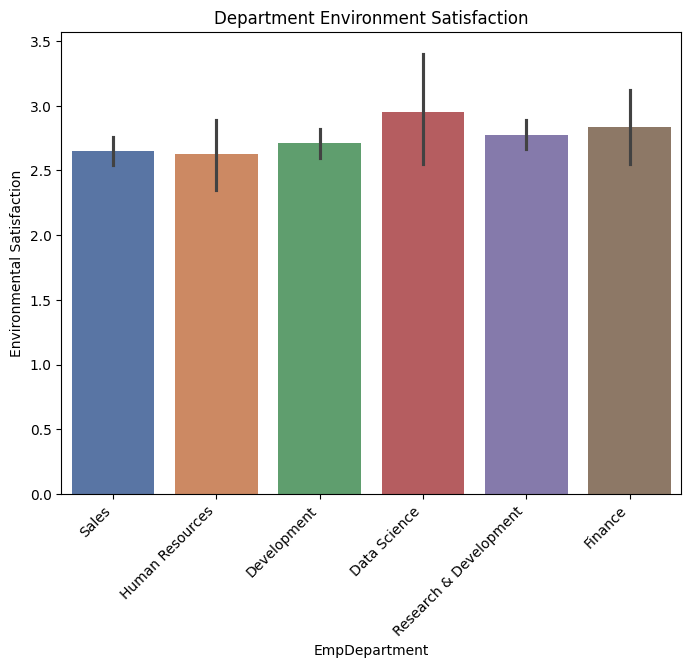

In [26]:
#checking how employees in each department are satisfied with their working environment

plt.figure(figsize=(8,6))
# Calculate the average environment satisfaction for each department
dept_env_satisfaction = df.groupby('EmpDepartment')['EmpEnvironmentSatisfaction'].mean().sort_values()

# Create the bar plot using the sorted data
sns.barplot(data=df, x='EmpDepartment', y='EmpEnvironmentSatisfaction',palette='deep')
plt.title('Department Environment Satisfaction')
plt.xlabel('EmpDepartment')
plt.ylabel('Environmental Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()

The employee Environmental Satisfaction average  rating in all the department is below 'High' hence many are between Medium and High ,hence indicating a gap in the working environment.Improving the working Environment which is positively correlated to the perfomance might help in improving the perfomance in each department.

<ipython-input-27-2199a4e5a8eb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_EmpLastSalaryHikePercent.index, y=dept_EmpLastSalaryHikePercent.values, palette='muted')


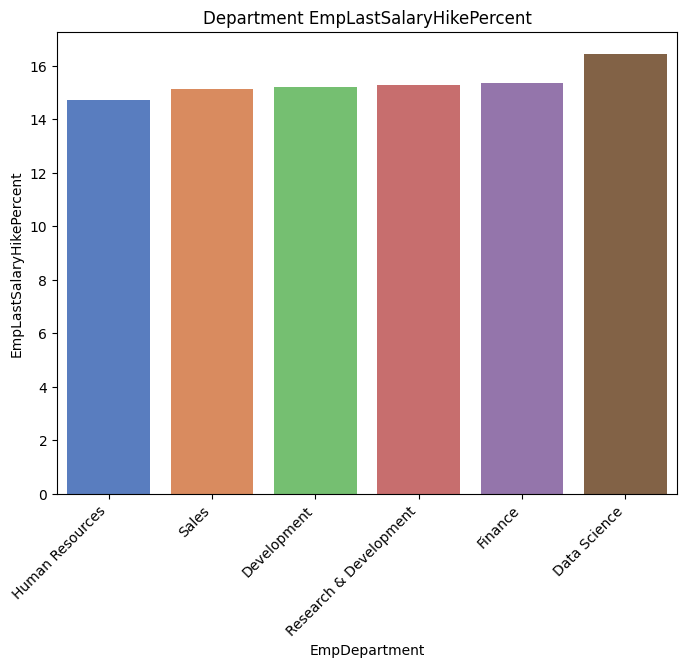

In [27]:
#Checking Employee Last Salary Hike Percent as per the Department.

plt.figure(figsize=(8,6))
# Calculate the average EmpLastSalaryHikePercent for each department
dept_EmpLastSalaryHikePercent = df.groupby('EmpDepartment')['EmpLastSalaryHikePercent'].mean().sort_values()

# Create the bar plot using the sorted data
sns.barplot(x=dept_EmpLastSalaryHikePercent.index, y=dept_EmpLastSalaryHikePercent.values, palette='muted')
plt.title('Department EmpLastSalaryHikePercent')
plt.xlabel('EmpDepartment')
plt.ylabel('EmpLastSalaryHikePercent')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar plot shows the last salary hike in different departments.
The percentage of the last salary hike is positively correlated with performance. Employees who receive higher salary increases may be more motivated and perform better.
The Data Science Department is one of the best perfoming department and they have a high salary hike percent and their environmental satisfaction is among the top hence showing a correlation as to why they are perfoming so well.

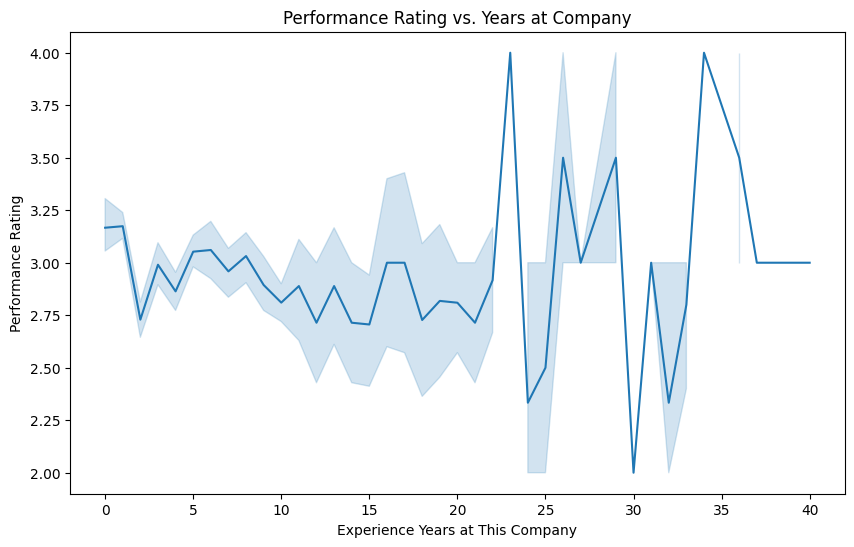

In [28]:
#Checking the perfomance Rating Vs Years at the Company
plt.figure(figsize=(10, 6))
sns.lineplot(x='ExperienceYearsAtThisCompany', y='PerformanceRating', data=df)
plt.title('Performance Rating vs. Years at Company')
plt.xlabel('Experience Years at This Company')
plt.ylabel('Performance Rating')
plt.show()

The line plot visualizes the relationship between the number of years an employee has been with the company and their performance rating.

Key Insights:

No Clear Trend: The line plot suggests there isn’t a strong correlation between the number of years at the company and performance rating, as performance ratings are across all experience levels.

 However, there might be a slight concentration of higher performance ratings for employees with 5-15 years of experience, indicating that mid-career employees may be performing well.

Outliers: Some long-tenured employees have low performance ratings, which might indicate disengagement or potential for improvement.
Implications:

The lack of a strong correlation suggests that tenure alone doesn’t determine performance, so the company should focus on other factors.
Mid-career employees could be a key group to engage for leadership development, while lower-performing long-tenured employees might need targeted support or reassessment.


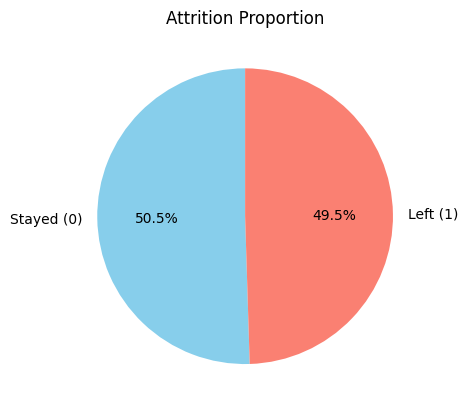

In [29]:
# Calculate average performance rating for each attrition category
attrition_performance = df.groupby('Attrition')['PerformanceRating'].mean()

# Assuming 'attrition_counts' is already calculated as in the previous example
labels = ['Stayed (0)', 'Left (1)']
plt.pie(attrition_performance,labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Attrition Proportion')
plt.show()

The pie chart compares the distribution of performance ratings between employees who have left the company (Attrition = Yes) and those who have stayed (Attrition = No).

Key Insights:

For employees who stayed,the distribution is slightly more than those who left,though there is no big difference ,this shows attrition does not have a strong correlation with perfomance.

The visualization suggests that employees with lower performance ratings are more likely to leave the company. This could indicate a correlation between lower job satisfaction or performance issues and higher attrition rates.
On the other hand, employees with higher performance ratings tend to stay with the company, suggesting that they are more engaged, satisfied, or recognized.

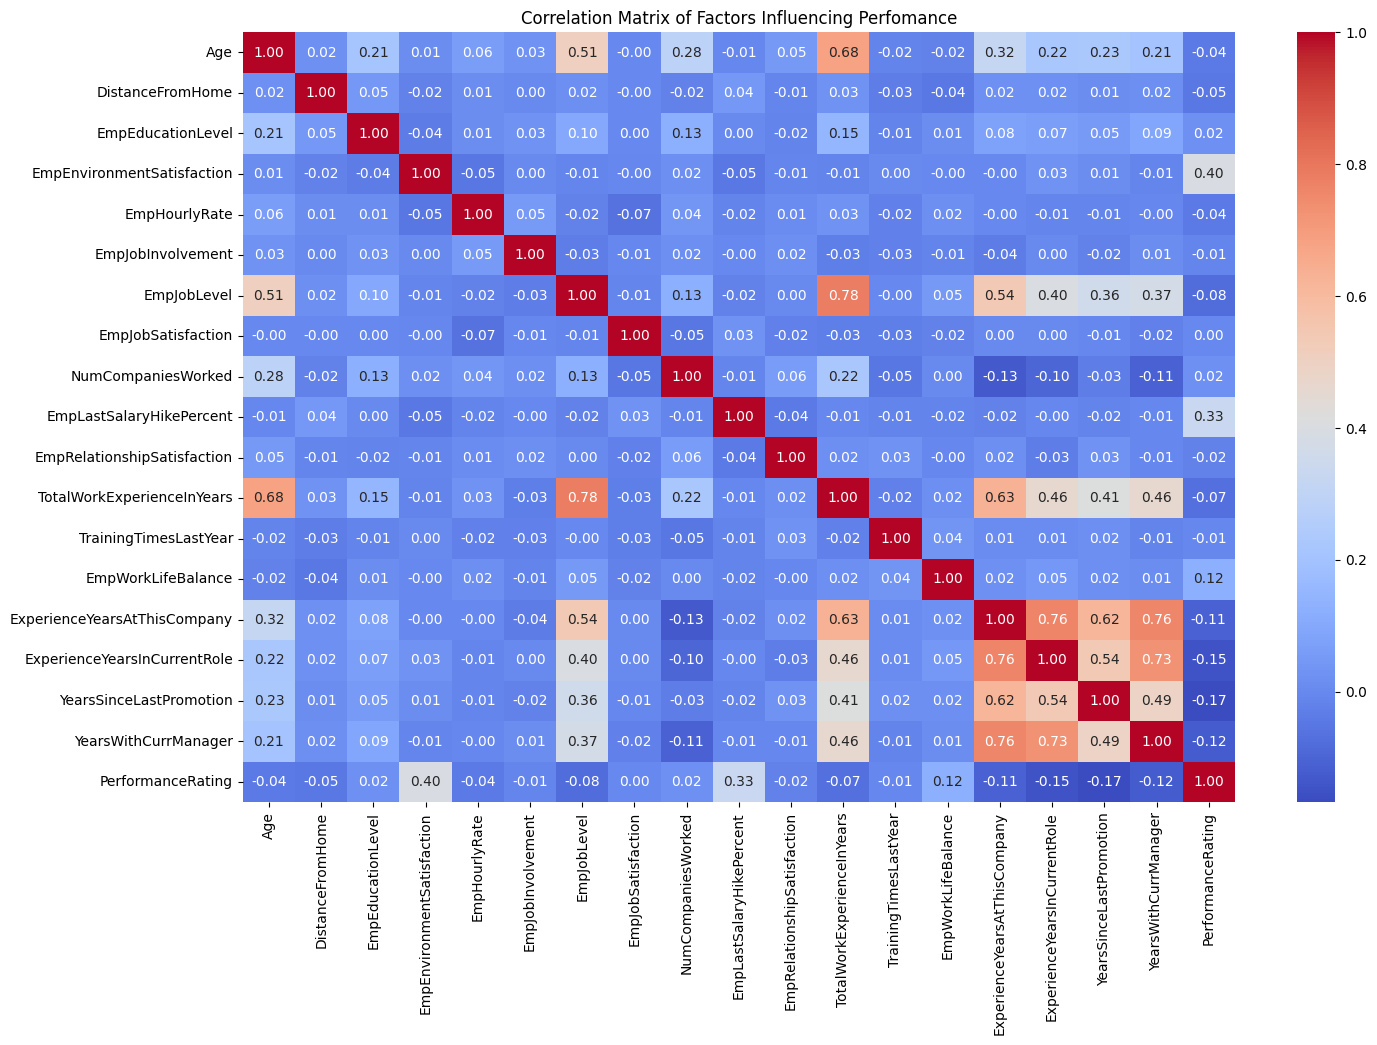

In [30]:
# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_data = df[numerical_columns]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Factors Influencing Perfomance')
plt.show()

The heatmap displays the correlations between various factors, helping you identify which ones are strongly related to employee performance.

EmpEnvironmentSatisfaction (Correlation: 0.40)

Employee satisfaction with their work environment is the strongest predictor of their performance. Enhancing the work environment can lead to better performance.

EmpLastSalaryHikePercent (Correlation: 0.33)

The percentage of the last salary hike is positively correlated with performance. Employees who receive higher salary increases may be more motivated and perform better.

EmpWorkLifeBalance(correlation:0.12) and EmpEducationLevel(correlation:0.02)  have a weaker, but still notable, correlation with performance.Employees with a higher Education Level,balance the work life balance and do not work on overtime would perform well.

These insights suggest that focusing on improving work environment satisfaction, offering competitive salary hikes, considering the Employee life work balance ,hiring employees with higher education level could significantly impact overall employee performance.

<ipython-input-31-7778ca1099a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors, y=corr_matrix.loc[top_factors, 'PerformanceRating'], palette='viridis')


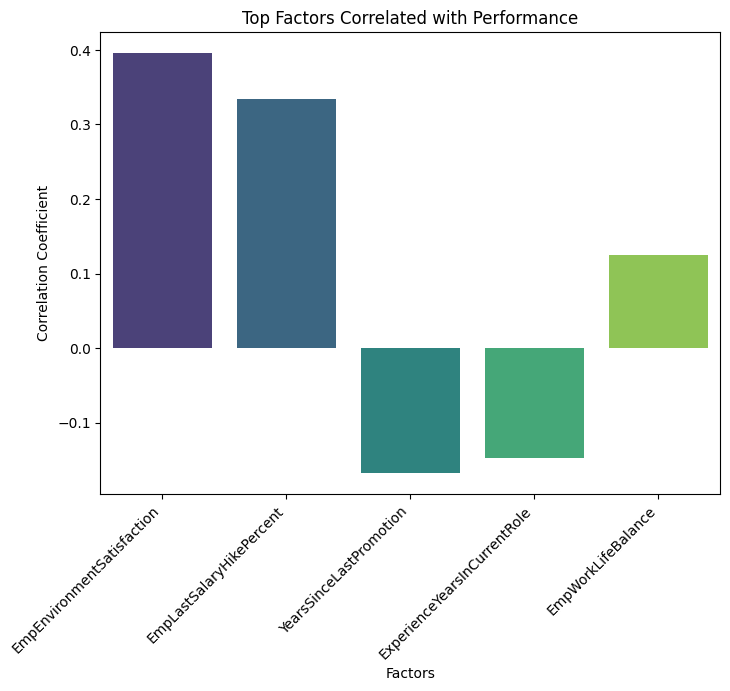

In [31]:
# Identify top factors affecting performance based on correlation
numerical_cols = df.select_dtypes(include=['int64']).columns
corr_matrix = df[numerical_cols].corr()
top_factors = corr_matrix['PerformanceRating'].abs().sort_values(ascending=False).index[1:6]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_factors, y=corr_matrix.loc[top_factors, 'PerformanceRating'], palette='viridis')
plt.title('Top Factors Correlated with Performance')
plt.xlabel('Factors')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.show()

A bar chart displaying some top factors that have the strongest correlation with performance ratings.

The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation,values close to 1 indicate a positive correlation and values close to 0 indicate little or no correlation.
PerformanceRating is the key metric of interest.


**FEATURE ENGINEERING**

In [32]:
#dropping the EmpNumber
df.drop(['EmpNumber'],axis=1,inplace=True)

In [33]:
#Encoding the categorical colummns since machine learning models cannot take string data.
from sklearn.preprocessing import LabelEncoder

def encode_columns(df, columns):
    le = LabelEncoder()
    df_encoded = df.copy()

    for column in columns:
        df_encoded[column] = le.fit_transform(df[column])

    return df_encoded

# Example usage:
columns_to_encode = [ 'Gender', 'EducationBackground', 'MaritalStatus',
                     'EmpDepartment', 'Attrition', 'EmpJobRole',
                     'BusinessTravelFrequency', 'OverTime']

df_encoded = encode_columns(df, columns_to_encode)


In [34]:
#checking if all columns are encoded
df_encoded.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


**EVALUATING THE ACCURACY OF DIFFERENT MODELS USED IN CLASSIFICATION.**


**RANDOM FOREST CLASSIFIER**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score



#Feature and Target Selection
features = ['EducationBackground','EmpDepartment','EmpJobRole','EmpEducationLevel','TotalWorkExperienceInYears',
            'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
            'YearsSinceLastPromotion','ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction',
            'TrainingTimesLastYear','EmpLastSalaryHikePercent',
            'ExperienceYearsAtThisCompany','YearsWithCurrManager','Attrition','OverTime',
            'EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent']
target = 'PerformanceRating'

X = df_encoded[features]
y = df_encoded[target]


#Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print("\nPrecision_score:", precision)
print("Recall_score:", recall)
print("F1-Score:", f1)
print("Accuracy_score:", accuracy)


Precision_score: 0.9428654533366574
Recall_score: 0.873662705684195
F1-Score: 0.9036491228070176
Accuracy_score: 0.9458333333333333


**LOGISTIC REGRESSION**

In [36]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

# Feature and Target Selection
features = ['EducationBackground','EmpDepartment','EmpJobRole','EmpEducationLevel','TotalWorkExperienceInYears',
            'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
            'YearsSinceLastPromotion','ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction',
            'TrainingTimesLastYear','EmpLastSalaryHikePercent',
            'ExperienceYearsAtThisCompany','YearsWithCurrManager','Attrition','OverTime',
            'EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent']
target = 'PerformanceRating'

X = df_encoded[features]
y = df_encoded[target]


#  Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model1 =LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


#Evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print("\nPrecision_score:", precision)
print("Recall_score:", recall)
print("F1-Score:", f1)
print("Accuracy_score:", accuracy)



Precision_score: 0.9377605698849223
Recall_score: 0.8506741999370684
F1-Score: 0.8887576025507061
Accuracy_score: 0.9375


**DECISION TREES**

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Feature and Target Selection
features = ['EducationBackground','EmpDepartment','EmpJobRole','EmpEducationLevel','TotalWorkExperienceInYears',
            'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
            'YearsSinceLastPromotion','ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction',
            'TrainingTimesLastYear','EmpLastSalaryHikePercent',
            'ExperienceYearsAtThisCompany','YearsWithCurrManager','Attrition','OverTime',
            'EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent']
target = 'PerformanceRating'

X = df_encoded[features]
y = df_encoded[target]



# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Model Selection and Training
model2 =DecisionTreeClassifier()
model.fit(X_train, y_train)

#  Prediction
y_pred = model.predict(X_test)

#  Evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')


print("\nPrecision_score:", precision)
print("Recall_score:", recall)
print("F1-Score:", f1)
print("Accuracy_score:", accuracy)


Precision_score: 0.9428654533366574
Recall_score: 0.873662705684195
F1-Score: 0.9036491228070176
Accuracy_score: 0.9458333333333333


**MODEL SELECTION**

Analysis:

**Accuracy:** Random Forest and Decision Tree both have a slightly higher accuracy (0.9417) compared to Logistic Regression (0.9333).

**Precision:** Random Forest and Decision Tree also lead in precision with a score of 0.9403, slightly higher than Logistic Regression’s 0.9263.

**Recall:** Random Forest and Decision Tree perform better in recall as well (0.8622 vs. 0.8489 for Logistic Regression).

**F1-Score:** The F1-Score, which balances precision and recall, is higher for Random Forest and Decision Tree (0.8963) compared to Logistic Regression (0.8826).

Conclusion:

Random Forest and Decision Tree are performing similarly and better than Logistic Regression in all metrics.

Since Random Forest generally provides more robustness due to ensemble averaging, it might be preferred over Decision Tree for a more generalized model.

In summary, Random Forest appears to be the best performer among the three models, especially when considering accuracy and F1-Score and hence will be selected for further development and deployment.






